In [1]:
%matplotlib inline

import json
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder
import pickle


In [2]:
df = pd.read_csv('../merged_1.6.1.csv')

data = []
labels = []

In [3]:
print(parser.samples)

{'Nonhomologous end-joining': ['XRCC6', 'XRCC5', 'PRKDC', 'LIG4', 'XRCC4', 'DCLRE1C', 'NHEJ1'], 'Microhomology end-joining': ['MRE11', 'RAD50', 'NBN', 'RBBP8', 'ERCC4', 'ERCC1', 'LIG1', 'POLL', 'POLB', 'PARP1', 'LIG3', 'XRCC1'], 'Homologous recombination': ['RAD51', 'RAD51B', 'RAD51D', 'DMC1', 'XRCC2', 'XRCC3', 'RAD52', 'RAD54L', 'RAD54B', 'BRCA1', 'SHFM1', 'RAD50', 'MRE11', 'NBN', 'RBBP8', 'MUS81', 'EME1', 'EME2', 'GIYD1', 'GIYD2', 'GEN1'], 'Base excision repair': ['UNG', 'SMUG1', 'MBD4', 'TDG', 'OGG1', 'MUTYH', 'NTHL1', 'MPG', 'NEIL1', 'NEIL2', 'NEIL3', 'APEX1', 'APEX2', 'LIG3', 'XRCC1', 'PNKP', 'APLF', 'PARP1', 'PARP2', 'PARP3', 'MGMT', 'ALKBH2', 'ALKBH3'], 'Repair of DNA-topoisomerase crosslinks': ['TDP1', 'TDP2'], 'Mismatch excision repair': ['MSH2', 'MSH3', 'MSH6', 'MLH1', 'PMS2', 'MSH4', 'MSH5', 'MLH3', 'PMS1', 'PMS2L3'], 'Nucleotide excision repair': ['RAD23B', 'CETN2', 'RAD23A', 'XPA', 'DDB1', 'DDB2', 'RPA1', 'RPA2', 'RPA3', 'TFIIH', 'ERCC3', 'ERCC2', 'GTF2H1', 'GTF2H2', 'GTF2

In [4]:
samples = parser.samples
s = set()
inputs = []
labels = []
counter = 0
for i in samples:
    for gene in samples[i]:
        if(gene in s):
            continue
        print(gene)
        if(not parser.checkValid(gene)):
            continue
        else:
            s.add(gene)
            inputs.append(gene)
            labels.append(gene)

XRCC6
XRCC5
PRKDC
LIG4
XRCC4
DCLRE1C
NHEJ1
MRE11
RAD50
NBN
RBBP8
ERCC4
ERCC1
LIG1
POLL
POLB
PARP1
LIG3
XRCC1
RAD51
RAD51B
RAD51D
DMC1
XRCC2
XRCC3
RAD52
RAD54L
RAD54B
BRCA1
SHFM1
MUS81
EME1
EME2
GIYD1
GIYD2
GEN1
UNG
SMUG1
MBD4
TDG
OGG1
MUTYH
NTHL1
MPG
NEIL1
NEIL2
NEIL3
APEX1
APEX2
PNKP
APLF
PARP2
PARP3
MGMT
ALKBH2
ALKBH3
TDP1
TDP2
MSH2
MSH3
MSH6
MLH1
PMS2
MSH4
MSH5
MLH3
PMS1
PMS2L3
RAD23B
CETN2
RAD23A
XPA
DDB1
DDB2
RPA1
RPA2
RPA3
TFIIH
ERCC3
ERCC2
GTF2H1
GTF2H2
GTF2H3
GTF2H4
GTF2H5
CDK7
CCNH
MNAT1
ERCC5
ERCC8
ERCC6
UVSSA
XAB2
MMS19
FANCA
FANCB
FANCC
BRCA2
FANCD2
FANCE
FANCF
FANCG
FANCI
BRIP1
FANCL
FANCM
PALB2
RAD51C
BTBD12
FAAP20
FAAP24
NUDT1
DUT
RRM2B
POLG
POLD1
POLE
PCNA
REV3L
MAD2L2
REV1L
POLH
POLI
POLQ
POLK
POLM
POLN
FEN1
FAN1
TREX1
TREX2
EXO1
APTX
SPO11
ENDOV
UBE2A
UBE2B
RAD18
SHPRH
HLTF
RNF168
SPRTN
RNF8
RNF4
UBE2V2
UBE2N
H2AFX
CHAF1A
SETMAR
ATR
ATRIP
MDC1
RAD1
RAD9A
HUS1
RAD17
CHEK1
CHEK2
TP53
TP53BP1
RIF1
TOPBP1
CLK2
PER1


In [6]:
pValues = parser.load_obj('pvalues')
data = parser.load_obj('data')

In [7]:
print(len(pValues)*2 - len(data))

0


312
312
0.6666666666666666
1.3333333333333333
2.6666666666666665
3.3333333333333335
4.666666666666667
5.333333333333333
6.666666666666667
7.333333333333333
8.666666666666666
9.333333333333334
10.666666666666666
11.333333333333334
12.666666666666666
13.333333333333334
14.666666666666666
15.333333333333334
16.666666666666668
17.333333333333332
18.666666666666668
19.333333333333332
20.666666666666668
21.333333333333332
22.666666666666668
23.333333333333332
24.666666666666668
25.333333333333332
26.666666666666668
27.333333333333332
28.666666666666668
29.333333333333332
30.666666666666668
31.333333333333332
32.666666666666664
33.333333333333336
34.666666666666664
35.333333333333336
36.666666666666664
37.333333333333336
38.666666666666664
39.333333333333336
40.666666666666664
41.333333333333336
42.666666666666664
43.333333333333336
44.666666666666664
45.333333333333336
46.666666666666664
47.333333333333336
48.666666666666664
49.333333333333336
50.666666666666664
51.333333333333336
52.6666666

Text(0.815, 0.013, ' Average Value')

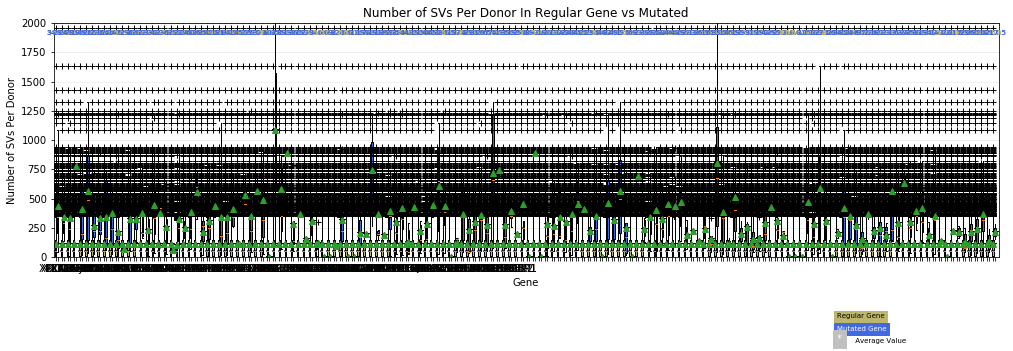

In [8]:
position = []
counter = 1
data = parser.load_obj('data')
while len(position) < len(data):
    if counter % 3 == 0:
        counter +=1
        continue
    position.append(counter/1.5)
    counter+=1
print(len(position))
print(len(data))
fig, ax1 = plt.subplots(figsize=(15, 5))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5, showmeans=True, widths = 0.5, positions=position)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title(
    'Number of SVs Per Donor In Regular Gene vs Mutated')
ax1.set_xlabel('Gene')
ax1.set_ylabel('Number of SVs Per Donor')

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0, num_boxes + 0.5)
top = 2000
bottom = 0
ax1.set_ylim(bottom, top)
ax1.set_xticks(position)
ax1.set_xticklabels(labels)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = position
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    print(pos[tick])
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, f'Regular Gene',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'Mutated Gene',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')

In [9]:
from statistics import median 
print(median(data[1]))

344.5


In [16]:
def autolabel(rects, significant):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in range(0, len(rects)):
        rect = rects[i]
        height = rect.get_height()
        if(significant[i] < (.005/len(significant))):
            annotation = '***'
        elif((significant[i] < (.01/len(significant)))):
            annotation = '**'
        elif((significant[i] < (.05/len(significant)))):
            annotation = '*'
        else:
            annotation = ''
        ax2.annotate(annotation,
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='center', color="black", fontsize=12, fontweight=)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310]


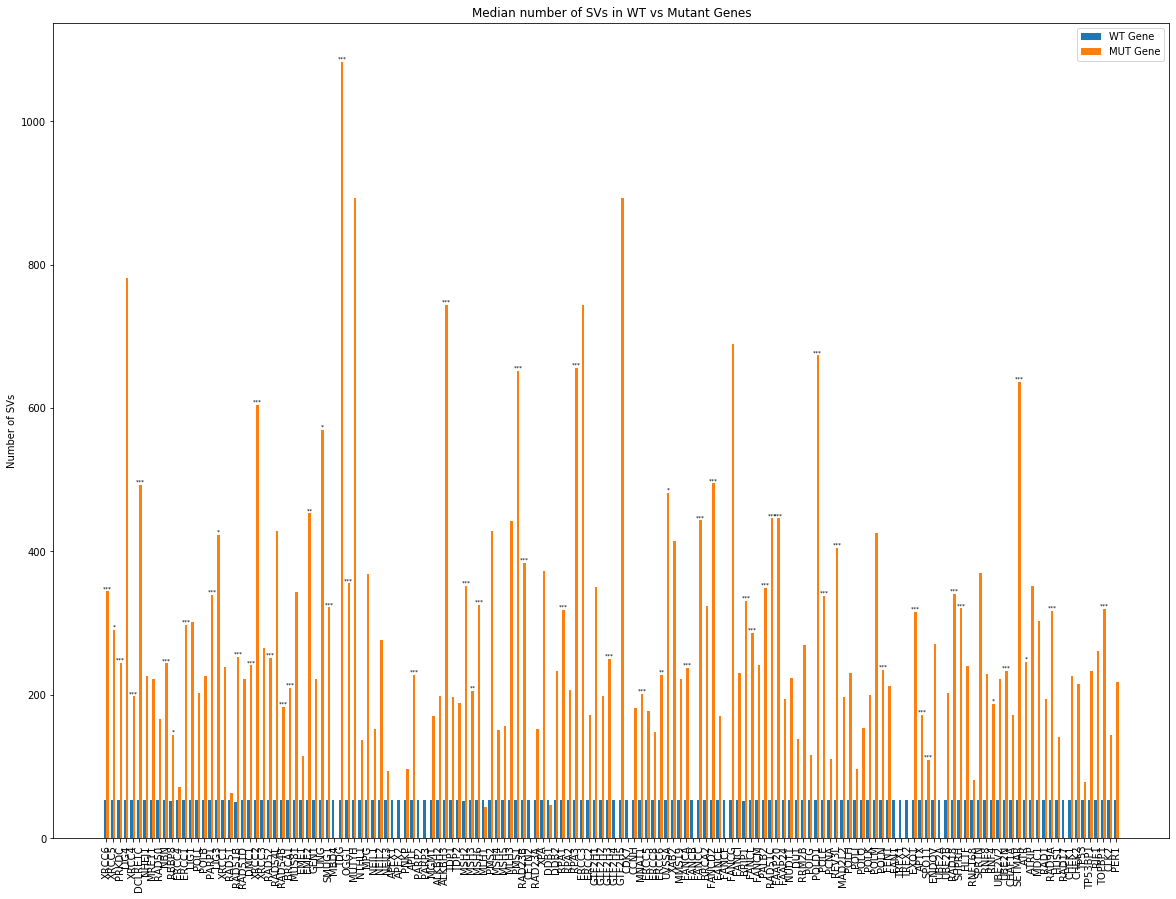

In [42]:
position = []
# counter = 1
# while len(position) < len(data):
#     if counter % 3 == 0:
#         counter += 1
#         continue
#     position.append(counter/1.5)
#     counter += 1
labels = []
for gene in inputs:
    labels.append(gene)
ind = np.arange(start=0, stop=len(data), step=2)  # the x locations for the groups
width = 0.75  # the width of the bars
fig2, ax2 = plt.subplots(figsize=(20, 15))
medians = []
print(ind)
for dataset in data:
    medians.append(median(dataset))
rects1 = ax2.bar(ind-width/2, medians[0::2], width,
                 label='WT Gene')
rects2 = ax2.bar(ind + width/2, medians[1::2], width,
                 label='MUT Gene')
ax2.set_ylabel('Number of SVs')
ax2.set_title('Median number of SVs in WT vs Mutant Genes')
ax2.set_xticks(ind)
ax2.set_xticklabels(labels)
plt.xticks(rotation=90)
ax2.legend()
autolabel(rects2, pValues)

In [147]:
def autolabel(rects, significant):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in range(0, len(rects)):
        rect = rects[i]
        height = rect.get_height()
        if(significant[i] < (.005/len(significant))):
           annotation = '***'
        elif((significant[i] < (.01/len(significant)))):
            annotation = '**'
        elif((significant[i] < (.05/len(significant)))):
            annotation = '*'
        else:
             annotation= ''
        print(annotation)
        ax2.annotate(annotation,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center', color="black", fontsize=6)

In [148]:
autolabel(rects2, pValues)


***

***
*




***


***





***

***
***






***





***

***
*
***




***



***


***
***
***
*


**
***

***
***


*
***
***








***

***

***



***

**
***


***
***


***

*

***
***











***

***
**

***






***



***


***

***

***
*

***
**
***


**







***

***



***




***






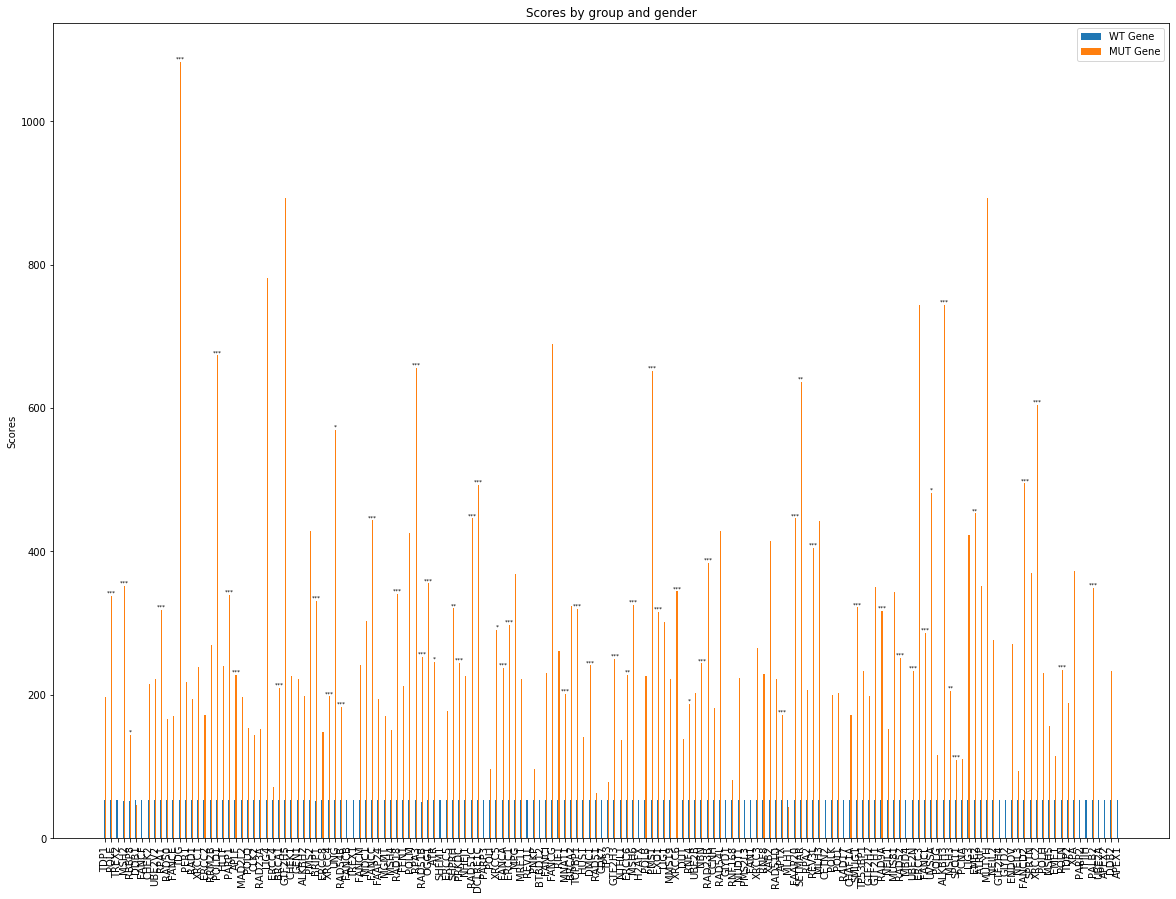

In [149]:
fig2